# CFG Degree- Data Stream- Homework Week 3


**Question 1 [20 points]:**


Create a pie chart which shows the proportion of male/female passengers. (Only plot required)

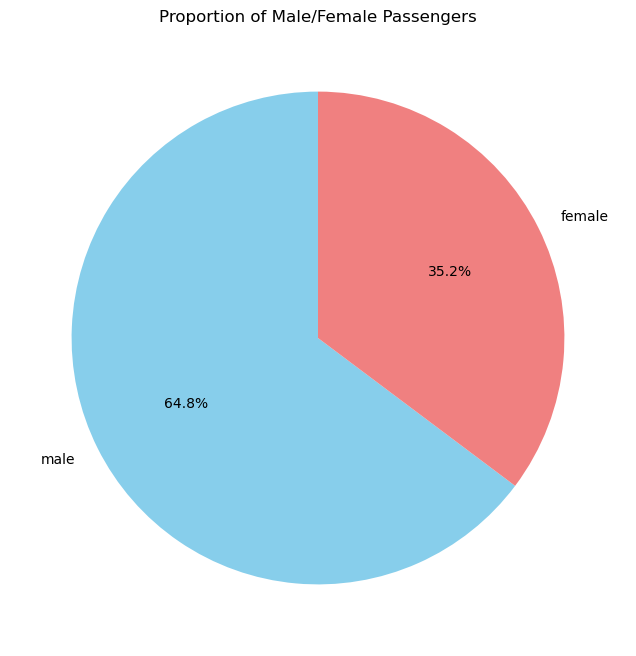

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

#here I can count the number of passengers of each gender

sex_counts = titanic['sex'].value_counts()

#here I specify the parameters of a pie chart

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Male/Female Passengers')
plt.show()


**Question 2 [20 points]:**

Create a pie chart which shows the proportion of passengers in each class (1, 2, 3). (Only plot required)


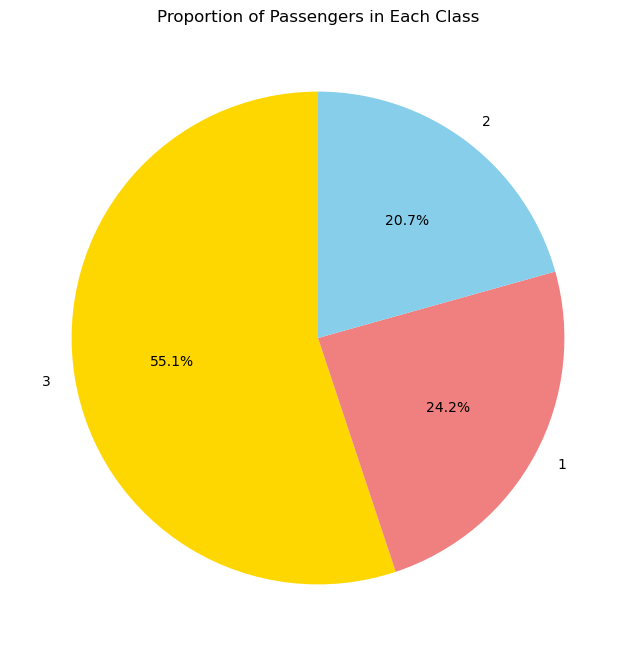

In [6]:
#here I count the number of passengers in each class

class_counts = titanic['pclass'].value_counts()

#here I specify the parameters of a pie chart

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'skyblue'])
plt.title('Proportion of Passengers in Each Class')
plt.show()



**Question 3 [20 points]:**

Explain the relationship between age and fare using a visualisation. (Plot and interpretation required)

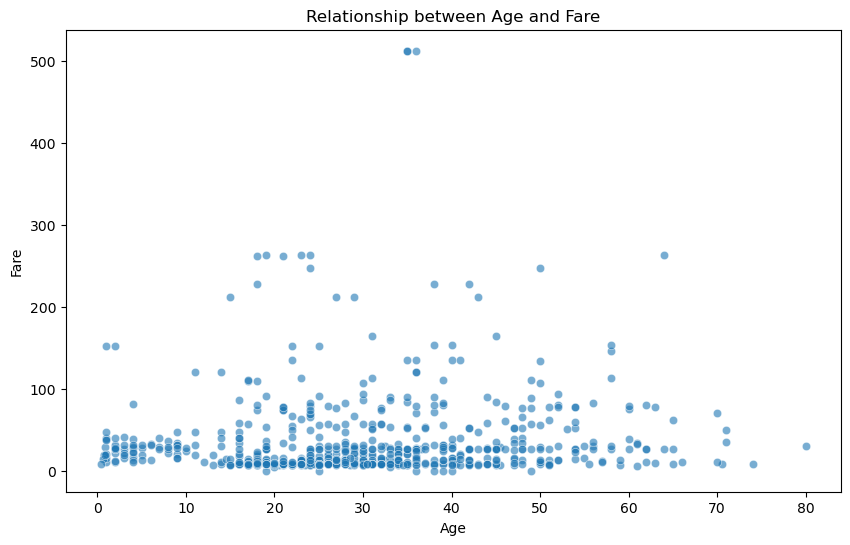

In [11]:

import seaborn as sns

#the warning messages were making me nervous so I hid them
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#This is where I create the visualisation. I think a scatter plot is the right choice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=titanic, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Interpretation:

Scatter Plot Overview:

The scatter plot displays individual points where each point represents a passenger.
The x-axis represents the passenger's age, and the y-axis represents the fare they paid.
Trend or Pattern:

Density of Points: 

Observing the distribution of the points, it appears that the majority of the passangers between 25-45 years of age paid between 0-100, with the majority of that sub-group paying 50 or less. A small number of passengers paid between 100-300, and only 2 guests in their mid-30's paid over 500.

Outliers:

The most notable outliers are the 2 passengers who paid over 500, a much higher amount than the rest of the passengers. There are only 7 guests over 70 years of age, and they all paid less than 100. This is interesting. Perhaps most wealthy people of that advanced age would not risk tranatlantic travel in those times. There is also also a noticable lack of minors under the age of 16 in the higher classes- only 5 are apparent. Again, perhaps only working-class families seeking better opportunities in a new country undertook the dangerous journey with their children, as they were not intending to return to their country of origin.

Correlation:

It seemed appropriate to calculate the correlation coefficient between Age and Fare, so see if there was a strong relationship between the two variables. This calculation produced a result of 0.10, whcih indicates a very weak positive correlation- indicating that there is not strong evidence that Passenger Age impacts Fare.

Conclusion:

In conclusion, the analysis of the Titanic Passenger dataset reveals a very weak positive correlation between passenger Age and Fare. While some interesting trends and outliers were observed, there is no strong evidence to suggest that Age significantly impacts Fare in this case. Further exploration is needed to understand the factors influencing fare prices and the demographics of Titanic passengers.

In [19]:

titanic_cleaned = titanic.dropna(subset=['age', 'fare'])

#here I calculate the correlation coefficient
correlation_coefficient = titanic_cleaned['age'].corr(titanic_cleaned['fare'])

print(f'Correlation between Age and Fare: {correlation_coefficient:.2f}')



Correlation between Age and Fare: 0.10


**Question 4 [40 points]:**

What is the survival ratio by age, sex, and class. (Plot and interpretation required)

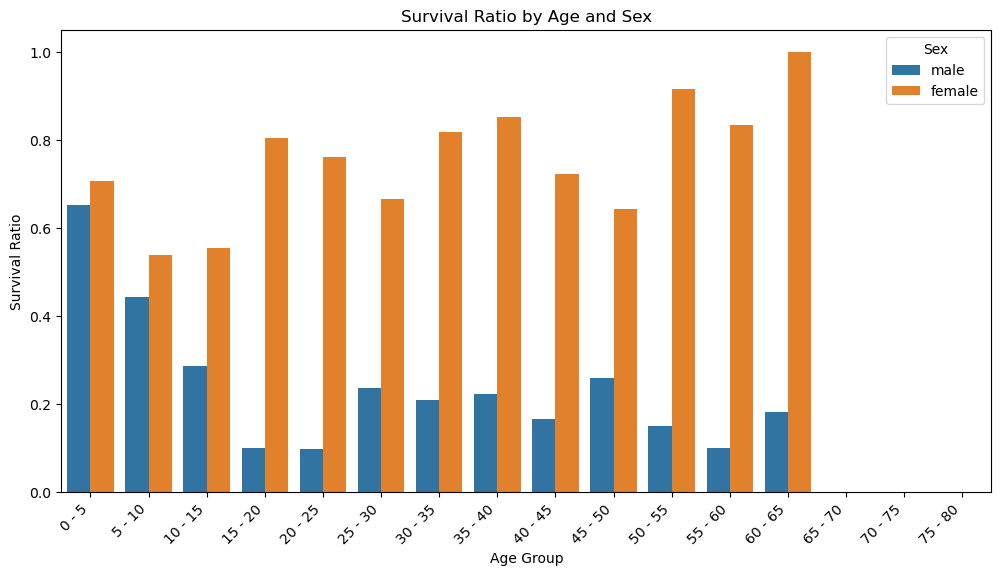

In [41]:

#here I create age-bins using 5 year intervals to make the data easier to dispay in a bar plot but retain granularity

age_bins = range(0, int(titanic['age'].max()) + 5, 5)
labels = [f'{start} - {end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

#here I group passengers into their age groups

titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=labels, right=False)

#here I ceate a bar plot showing the survival ratio by age

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='survived', hue='sex', data=titanic, ci=None)
plt.title('Survival Ratio by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex', loc='upper right')
plt.show()


Interpretation:

Survival Ratio by Age and Sex: 

Observing the survival ratios for different age groups (e.g., 0 - 10, 11 - 20) while distinguishing between male and female passengers, several patterns emerge:

In the age group 1-5, both genders had similar survival rates, indicating that young children had a similar likelihood of survival regardless of gender.
Between ages 5-20, the survival rate for male passengers steadily decreases, while female survival rates remain consistently higher. Notably, female children between 5-15 had the lowest survival rate among females.
Excluding minors (0-15), the age group 45-50 exhibits the least gender discrepancy in survival rate, although it is generally lower than the survival rates of other age groups.
The age groups 50-65 show the highest overall survival rates, suggesting that passengers in this age range had a higher likelihood of survival.

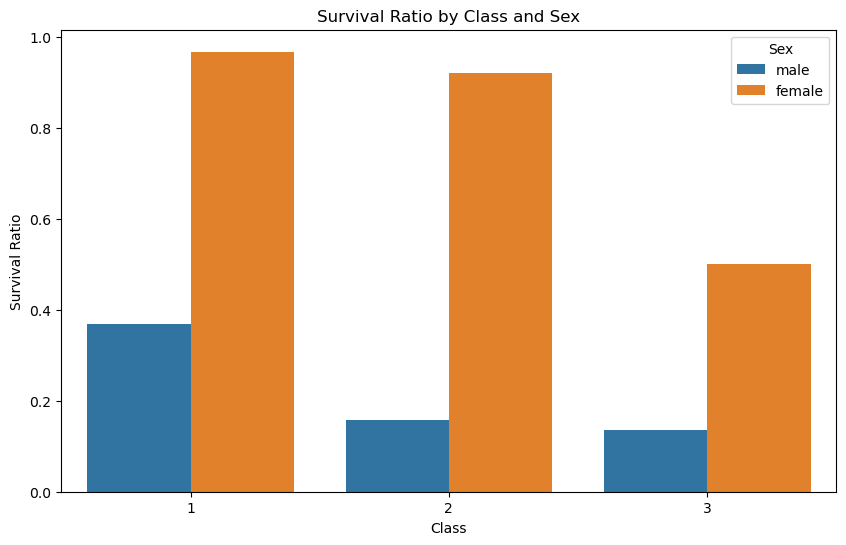

In [39]:
#here I create a bar plot showing the survival ratio by class

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, ci=None)
plt.title('Survival Ratio by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=0)
plt.legend(title='Sex', loc='upper right')
plt.show()



Interpretation:

Survival Ratio by Class and Sex:

Analyzing survival ratios across different passenger classes (1st, 2nd, 3rd) while considering gender differences reveals the following insights:

Women from all classes had significantly higher survival rates compared to men across the board.
First-class passengers had the highest survival rate among all classes, indicating that passengers in first class were more likely to survive the disaster.
Second and third-class passengers had lower survival rates in comparison to first-class passengers, with third-class passengers experiencing the lowest survival rate.




Thanks so much for your attention! Amy-Louise Snelling